<a href="https://colab.research.google.com/github/lsantiago/PythonIntermedio/blob/master/Talleres/PrimerBimestre/TallerNro2-PANDA-MATPLOTLIB/TallerNro2PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER NRO. 2, PANDAS + MATPLOTLIB

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Importar ambas tablas de datos en python usando pandas. Poner la columna del índice en "MESS_DATUM" y analizar los valores de la columna como fechas.
garmisch  = pd.read_csv("./data/garmisch.txt",parse_dates=["MESS_DATUM"], index_col=["MESS_DATUM"], sep=";")
zugspitze = pd.read_csv("./data/zugspitze.txt",parse_dates=["MESS_DATUM"], index_col=["MESS_DATUM"], sep=";")
garmisch.head()
zugspitze.head()

,STATIONS_ID,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
MESS_DATUM,,,,,,,,,,,,,,,,,,
2017-10-10,5792,10,15.3,6.8,3,0.2,7,2.133,64,7.3,4.1,711.35,-4.5,93.67,-3.0,-6.1,-999,eor
2017-10-11,5792,10,23.3,12.1,3,0.0,0,10.517,62,3.0,3.9,714.43,-1.3,70.21,0.9,-3.6,-999,eor
2017-10-12,5792,10,24.2,11.1,3,0.0,0,9.350,60,1.7,4.4,717.22,-1.2,78.04,0.1,-2.6,-999,eor
2017-10-13,5792,10,20.0,8.6,3,0.0,0,10.383,55,4.0,3.5,720.26,0.9,52.63,2.7,-0.8,-999,eor
2017-10-14,5792,10,9.8,4.3,3,0.0,0,10.917,50,1.0,4.9,722.57,4.8,58.04,8.8,1.6,-999,eor


In [31]:
# Recorta las tablas a el año 2018 [1P]

garmisch.loc["2018"].head()
zugspitze.loc["2018"].head()


,STATIONS_ID,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
MESS_DATUM,,,,,,,,,,,,,,,,,,
2018-01-01,5792,10,31.4,11.8,3,5.3,7,2.133,263,6.0,2.2,698.43,-10.2,78.67,-5.2,-13.2,-999,eor
2018-01-02,5792,10,27.2,11.5,3,14.2,7,0.067,260,6.7,1.9,698.88,-13.4,87.58,-7.2,-15.8,-999,eor
2018-01-03,5792,10,48.6,18.3,3,14.4,7,0.017,270,8.0,3.0,694.87,-8.8,92.08,-4.1,-13.7,-999,eor
2018-01-04,5792,10,35.7,15.8,3,39.5,7,0.000,280,8.0,3.6,694.91,-7.0,95.38,-3.3,-12.9,-999,eor
2018-01-05,5792,10,30.6,13.6,3,0.0,7,4.567,310,6.7,3.6,698.36,-5.0,84.75,-3.1,-6.7,-999,eor


In [22]:
# Volver a muestrear los datos de temperatura a promedios mensuales (" TMK") y los datos de precipitaciones a sumas mensuales (" RSK"): [1P]
garmisch_agg = garmisch.loc[:, [" TMK", " RSK"]].resample("M").agg({" TMK": "mean", " RSK": "sum"}).head()
print(garmisch_agg)
zugspitze_agg = zugspitze.loc[:, [" TMK", " RSK"]].resample("M").agg({" TMK": "mean", " RSK": "sum"}).head()
print(zugspitze_agg)

                 TMK    RSK
MESS_DATUM                 
2017-10-31  9.022727   45.1
2017-11-30  2.376667   97.1
2017-12-31 -1.845161   93.6
2018-01-31  0.806452  220.4
2018-02-28 -3.353571   55.2
                  TMK    RSK
MESS_DATUM                  
2017-10-31  -1.472727  131.7
2017-11-30  -7.880000  253.1
2017-12-31 -11.425806  215.2
2018-01-31  -8.732258  295.6
2018-02-28 -14.764286   86.0


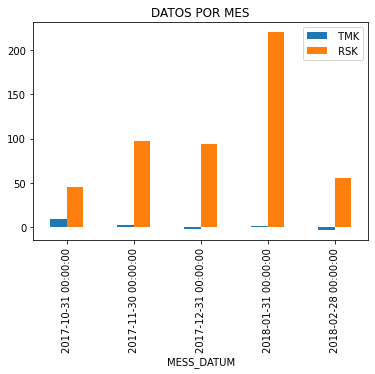

In [35]:
garmisch_agg.plot(kind='bar',title="DATOS POR MES");

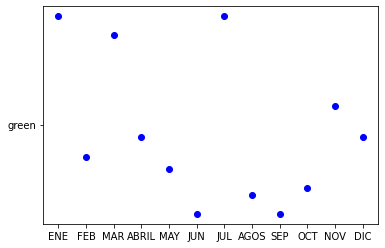

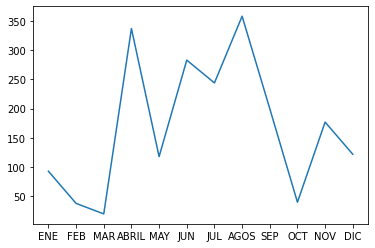

In [5]:
a = np.arange(-15,20)
b = np.arange(0,370)
temperatura = np.random.choice(a, 12)
precipitacion = np.random.choice(b, 12)
meses = np.array(["ENE","FEB","MAR","ABRIL","MAY","JUN","JUL","AGOS","SEP","OCT","NOV","DIC"])
plt.plot(meses,temperatura, "bo", "green")
plt.show()
plt.plot(meses,precipitacion)
plt.show()

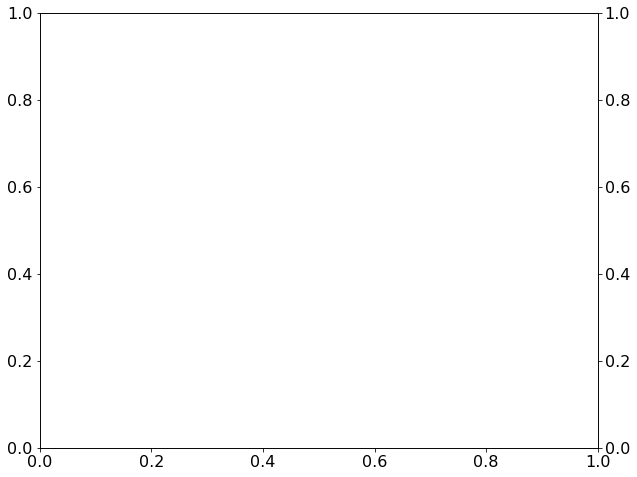

In [46]:
a = np.arange(-15,20)
b = np.arange(0,370)
def crear_diagrama_climatico(a, b, c=2):
    """
    Dibuja un diagrama climático.
    
    Parametros
    ----------
    df : pd.DataFrame
        Dataframe de datos con valores para graficar
    temp_col : str
        Nombre de la columna de temperatura
    prec_col : str
        Nombre de la columna de precipitación
    title : String
        El título para la figura
    filename : String
        El nombre de la figura de salida
    temp_min : Number
        El valor mínimo de temperatura a mostrar
    temp_max : Number
        El valor máximo de temperatura a mostrar
    prec_min : Number
        El valor mínimo de precipitación a mostrar
    prec_max : Number
        El valor máximo de precipitación a mostrar

    Returns
    -------
    La figura
    
    """
#     temperatura = np.random.choice(a, 12)
#     precipitacion = np.random.choice(b, 12)
#     meses = np.array(["ENE","FEB","MAR","ABRIL","MAY","JUN","JUL","AGOS","SEP","OCT","NOV","DIC"])
#     plt.plot(meses,temperatura)
#     plt.show()
#     plt.plot(meses,precipitacion)
#     plt.show()

    fig = plt.figure(figsize=(10,8))
    plt.rcParams['font.size'] = 16

    ax2 = fig.add_subplot(111)
    ax1 = ax2.twinx()

crear_diagrama_climatico(a,b)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importar ambas tablas de datos en python usando pandas. Poner la columna del índice en "MESS_DATUM" y analizar los valores de la columna como fechas.
garmisch  = pd.read_csv("./data/garmisch.txt",parse_dates=["MESS_DATUM"], index_col=["MESS_DATUM"], sep=";")
zugspitze = pd.read_csv(...)

# Recorta las tablas a el año 2018 [1P]
garmisch  = 
zugspitze = 

# Volver a muestrear los datos de temperatura a promedios mensuales (" TMK") y los datos de precipitaciones a sumas mensuales (" RSK"): [1P]
garmisch_agg  = 
zugspitze_agg = 

# Define una función de trazado que dibuja un simple diagrama climático
# Agrega los argumentos como se menciona en la lista de documentos abajo [1P]
# Establece el rango de temperatura por defecto de -15°C a 20°C y el rango de precipitaciones de 0mm a 370mm [1P]

def crear_diagrama_climatico(a, b, c=2):
    """
    Dibuja un diagrama climático.
    
    Parametros
    ----------
    df : pd.DataFrame
        Dataframe de datos con valores para graficar
    temp_col : str
        Nombre de la columna de temperatura
    prec_col : str
        Nombre de la columna de precipitación
    title : String
        El título para la figura
    filename : String
        El nombre de la figura de salida
    temp_min : Number
        El valor mínimo de temperatura a mostrar
    temp_max : Number
        El valor máximo de temperatura a mostrar
    prec_min : Number
        El valor mínimo de precipitación a mostrar
    prec_max : Number
        El valor máximo de precipitación a mostrar

    Returns
    -------
    La figura
    
    """

    fig = plt.figure(figsize=(10,8))
    plt.rcParams['font.size'] = 16

    ax2 = fig.add_subplot(111)
    ax1 = ax2.twinx()

    
    
    # Dibuja los valores de temperatura como una línea roja y los valores de precipitación como barras azules: [1P]
    # Pista: Revisa la documentación de matplotlib cómo trazar gráficos de barras (plt.bar?). Intenta establecer directamente la correcta
    # etiquetas del eje X (nombres cortos de los meses)
    ax2.bar(df.index.strftime("%b"), df.loc[:," RSK"].values, ...)
    ax1.plot(...)
    
    # Establezca los límites apropiados para cada eje Y usando los argumentos de la función: [1P]
    ax2.
    ax1.
    
    # Ponga las etiquetas apropiadas a cada eje Y: [1P]
    ax2.
    ax1.

    # Dale a tu diagrama el título de los argumentos proporcionados: [1P]
    plt.title(...)

    # Guarda la figura como imagen png en la carpeta "output" con el nombre de archivo dado. [1P]
    #...
    return fig

# Utilice esta función para dibujar un diagrama climático para 2018 para ambas estaciones y guarde el resultado: [1P]
crear_diagrama_climatico(...)
crear_diagrama_climatico(...)
